<a href="https://colab.research.google.com/github/swamyshravan/data-science-projects/blob/main/Artificial-Neural-Networks/admissions_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Check tensorflow version**

In [4]:
tf.__version__

'2.7.0'

**Read data from the test file**

In [24]:
data = pd.read_table('admission.txt', sep='\t')
x = data.iloc[:,1:]
y = data.iloc[:,0]
#len(data)

**Divide the dataset into training and testing data**

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

**Normalise the data**

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
norm_train = sc.fit_transform(x_train)
norm_test = sc.fit_transform(x_test)
len(norm_train), len(norm_test)

(320, 80)

**Building ANN**

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [10]:
model.add(tf.keras.layers.Dense(units=36, activation='relu'))

In [11]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compiling the model

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the model

In [13]:
model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
32/32 [==============================] - 1s 2ms/step - loss: 5.9886 - accuracy: 0.5437
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 0.7369 - accuracy: 0.6375
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7686 - accuracy: 0.6156
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6656
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.6250
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.5875
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6313
Epoch 8/15
32/32 [==============================] - 0s 3ms/step - loss: 0.8999 - accuracy: 0.5688
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7740 - accuracy: 0.5781
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.5781
Epoch 11/15
32/32 [

In [14]:
#model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)))

In [15]:
#model.add(tf.keras.layers.Dropout(0.2))

In [16]:
#model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [17]:
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [18]:
#model.fit(x_train, y_train, epochs =15)

**Evaluating the model**

In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.7346 - accuracy: 0.6875


In [20]:
ypred = (model.predict(norm_test)>= 0.5)

In [21]:
ypred.shape, y_test.shape

((80, 1), (80,))

**Creting a confusion matrix**

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        55
           1       0.42      0.40      0.41        25

    accuracy                           0.64        80
   macro avg       0.57      0.57      0.57        80
weighted avg       0.63      0.64      0.64        80



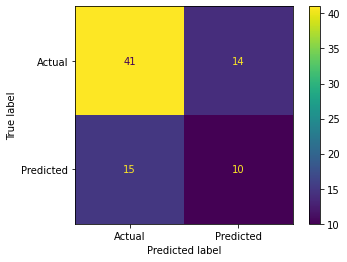

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Actual','Predicted'])
cmd.plot()
cr = classification_report(y_test, ypred)
print(cr)